# Data Description

We need to train a model which can be used to predict the probability of customer paying back the loan amount within 5 days of insurance of loan.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# import libraries here whenever necessary

# Loading the dataset

In [2]:
dt=pd.read_csv('C:/Users/ashis/OneDrive/Fliprobo/Micro-Credit-Project/Micro Credit Project/Data file.csv')

In [3]:
dt.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


##### Observation:-
    
    After loading the dataset from .csv format, we have got double indexing in our dataframe. We need to remove it.

In [4]:
dt=dt.drop('Unnamed: 0',axis=1)
dt.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


##### Observation:-
    
    We have successfully removed the extra indexing from our dataframe.

# Performing EDA on dataset

### checking dataset dimensionality

In [5]:
dt.shape

(209593, 36)

##### Observation:-
    
    Our dataset has more than 2 Lakh rows of data which is divided between 35 independent variable columns and 1 target column.

### checking the datatypes of columns and missing values,if any.

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

##### Observation:-
    
    Our dataset has 21 columns with float64 types, 12 columns with int64 type and 3 columns with object type.
    
    And, the dataset has no missing values.

### Handling of date columns

##### Observation:-
    
    We have 3 columns with 'object' datatype, so before plotting distribution curve for all columns we need to decide what steps to take for those columns.
    
    We will convert the 'pdate' column which has date into two seperate columns of month and year, so that we can find the relation between purchase month/year to the defaulting behavior.

In [7]:
dt['pdate'].dtype

dtype('O')

In [8]:
#converting object datatype 'pdate' column to datetype
dt['pdate']=pd.to_datetime(dt['pdate'])

In [9]:
dt['pdate'].dtype # date type conversion successful

dtype('<M8[ns]')

In [10]:
dt['year']=dt['pdate'].dt.year
dt['month']=dt['pdate'].dt.month

In [11]:
dt.drop('pdate',axis=1,inplace=True)

In [12]:
dt.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'year', 'month'],
      dtype='object')

##### Observation:-
    
    We have seperated the months and years from the 'pdate' column, now we will process the remaining object type 'msisdn' and 'pcircle' columns.
    
    We will ignore the 'msisdn' column which contains the mobile number of users as this will not affect the prediction.

### Handling of 'msisdn' (customer mobile number) column

In [13]:
dt.shape

(209593, 37)

In [14]:
dt.drop('msisdn',axis=1,inplace=True)

In [15]:
dt.shape

(209593, 36)

##### Observation:-
    
    We have dropped the 'msisdn' column, now we will check the values in 'pcircle'(telecom circle) column to decide on it.

### Handling of 'pcircle' (telecom circle) column

In [16]:
dt['pcircle'].unique()

array(['UPW'], dtype=object)

##### Observation:-
    
    As we can see, there is only one value present in 'pcircle' column, so it is not relevant for prediction . SO we will drop it.

In [17]:
dt.drop('pcircle',axis=1,inplace=True)

In [18]:
dt.shape

(209593, 35)

In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

##### Observation:-
    
    As we can see , our dataset now contains 35 columns and data in float64 and int64 datatype, which is helpful in pre-processing of data

### checking for null(missing) values using heatmap

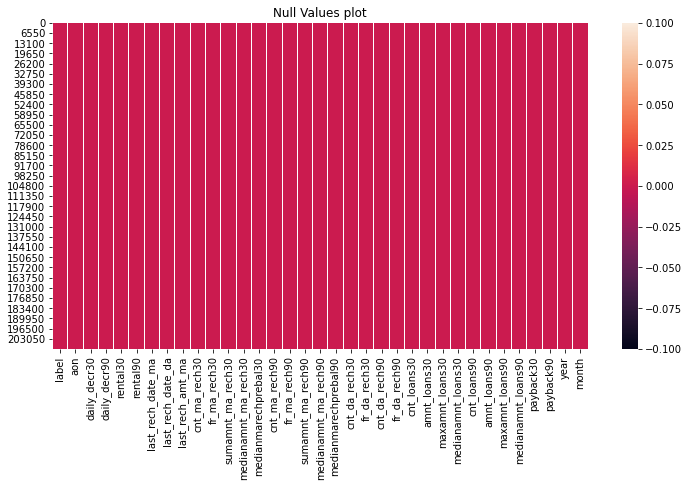

In [20]:
plt.figure(figsize=[12,6])
sn.heatmap(dt.isnull())
plt.title('Null Values plot')
plt.show()

##### Observation:-
    
    From heatmap we can see there are no missing values for any column.

# checking correlation of independent variables with target column

In [21]:
dt_corr=dt.corr()

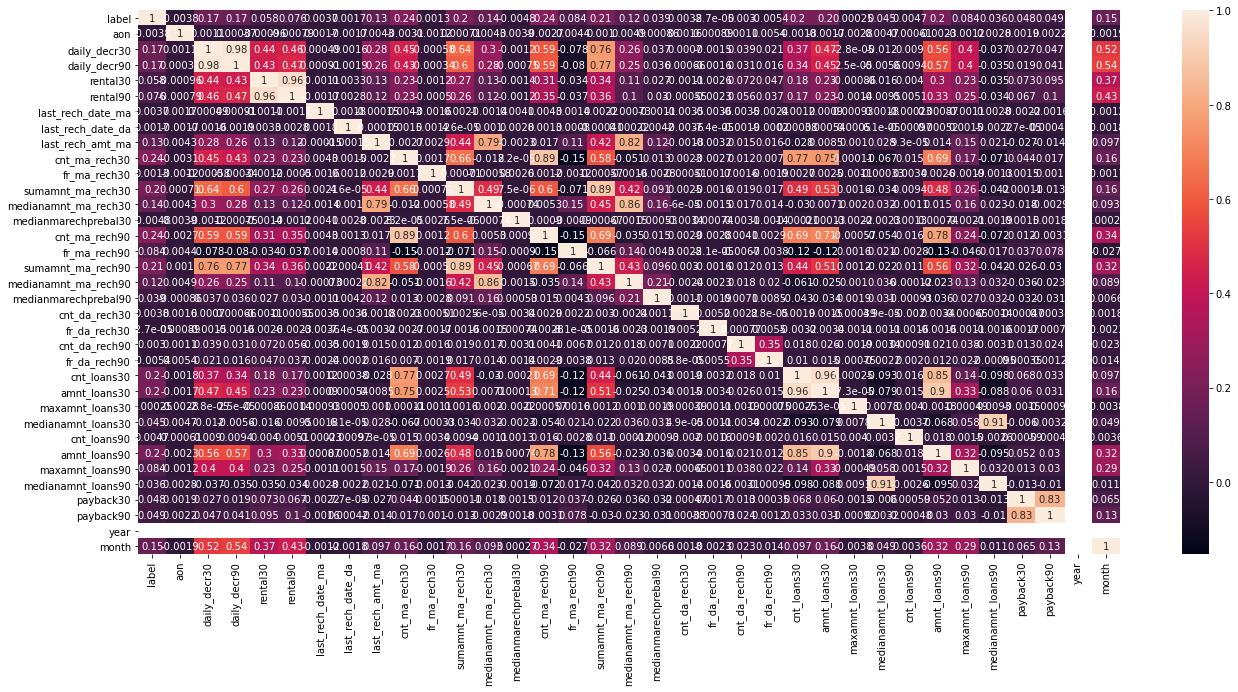

In [22]:
plt.figure(figsize=[22,10])
sn.heatmap(dt_corr,annot=True)
plt.show()

##### Observation:
    
    We can see the target variable 'label' is represented with dark colors corresponding to every independent variables. So the dataset donot have correlation between any column and target variable. But it is hard to analyse for all columns using heatmap so we will just print the correlation of target column with other variables.

In [23]:
dt_corr['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech

##### Observation:
    
    We see that almost all columns have 0 correlatio with target variable 'label'. So we need to use other steps to find the useful columns for prediction.

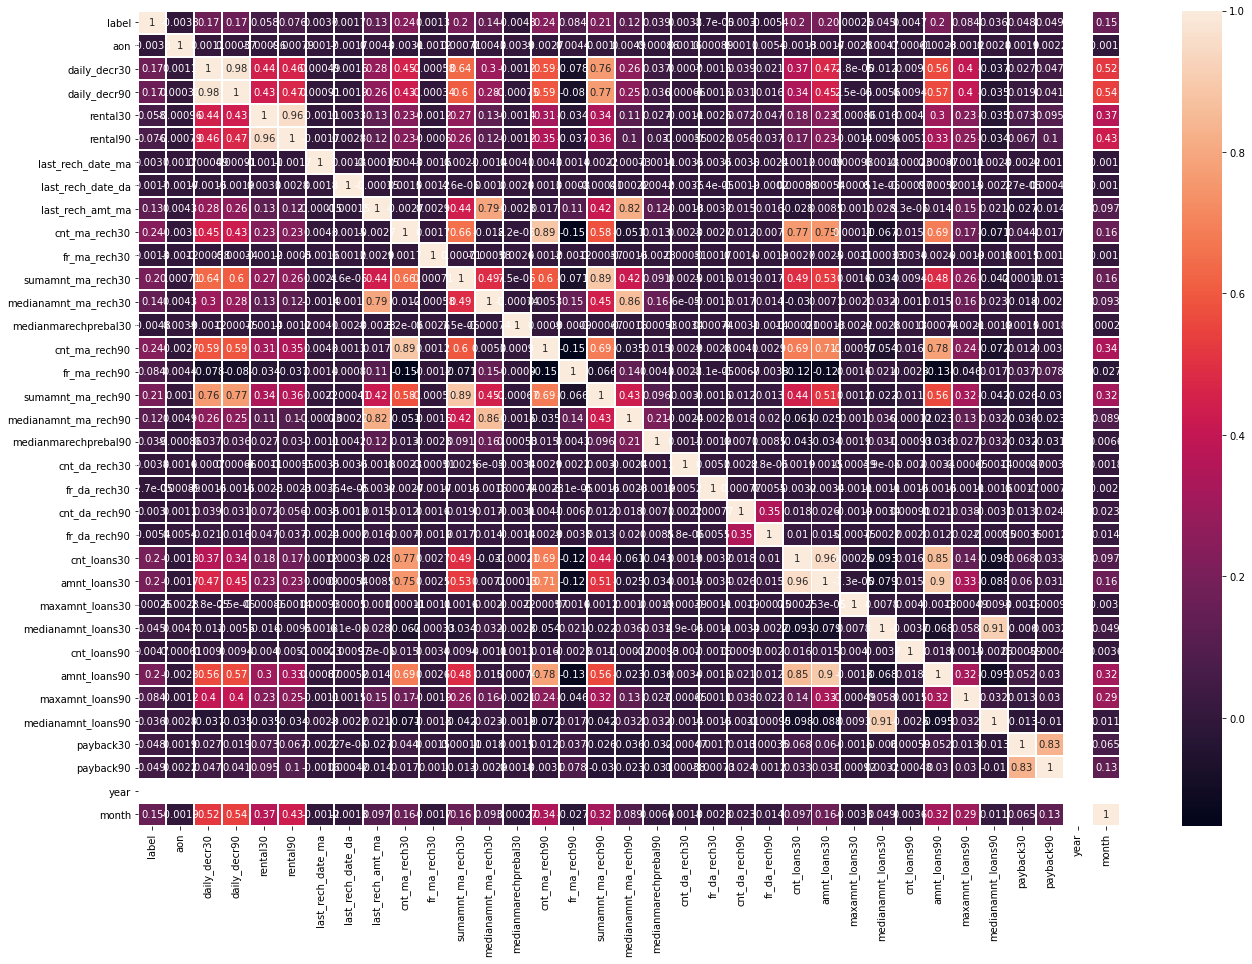

In [24]:
# again, plotting heatmap for correlation
plt.figure(figsize=[22,15])
sn.heatmap(dt_corr,annot=True,linewidths=1,linecolor='white')
plt.show()

Observation:-
    
    from above heatmap we can find some columns which are correlated with each other and we can further analyse them using bivariate analysis.
    
    daily_decr30 & daily_decr90 
    rental30 & rental90
    cnt_ma_rech30 & cnt_ma_rech90
    sumamnt_ma_rech30 & sumamnt_ma_rech90
    cnt_loans30 & amnt_loans30
    amnt_loans30 & amnt_loans90

# Bivariate analysis

#### daily_decr30 vs daily_decr90

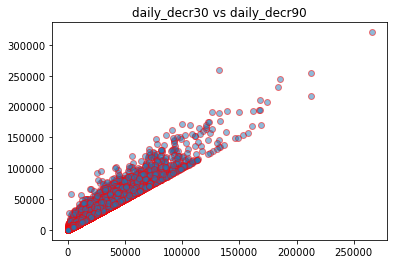

In [25]:
plt.scatter(dt["daily_decr30"],dt["daily_decr90"],alpha=0.5,edgecolors='r')
plt.title("daily_decr30 vs daily_decr90")
plt.show()

Observation:
    
    We can use any one of the above two independent variables as they both are highly correlated.
    
    Before dropping , we will check distribution for both the variables so as to decide which one to drop.

<AxesSubplot:ylabel='Density'>

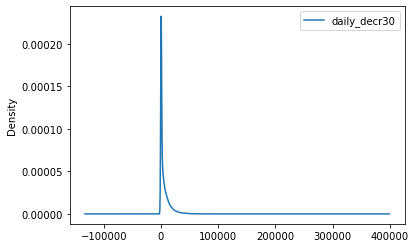

In [26]:
dt['daily_decr30'].plot(kind='density',legend=True)

<AxesSubplot:ylabel='Density'>

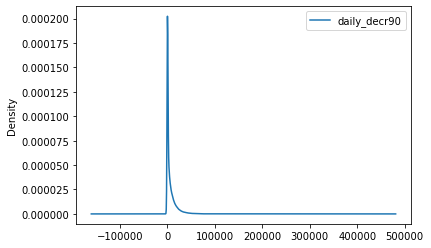

In [27]:
dt['daily_decr90'].plot(kind='density',legend=True)

In [28]:
# both variables are normal distributed,so drop any one
dt_new=dt.drop('daily_decr30',axis=1)
dt_new.shape

(209593, 34)

In [29]:
dt.shape

(209593, 35)

#### rental30 vs rental90

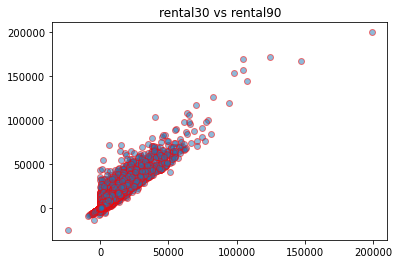

In [30]:
plt.scatter(dt["rental30"],dt["rental90"],alpha=0.5,edgecolors='r')
plt.title("rental30 vs rental90")
plt.show()

Observation:
    
    We can use any one of the above two independent variables as they both are highly correlated.
    
    Before dropping , we will check distribution for both the variables so as to decide which one to drop.

<AxesSubplot:ylabel='Density'>

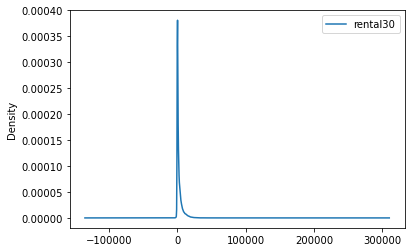

In [31]:
dt['rental30'].plot(kind='density',legend=True)

<AxesSubplot:ylabel='Density'>

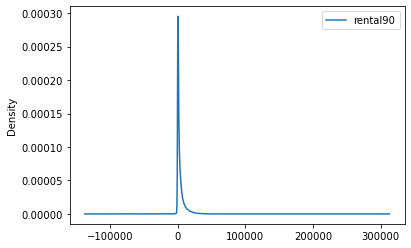

In [32]:
dt['rental90'].plot(kind='density',legend=True)

In [33]:
dt_new.shape

(209593, 34)

In [34]:
# both variables are normal distributed,so drop any one
dt_new=dt_new.drop('rental30',axis=1)

In [35]:
dt_new.shape

(209593, 33)

#### cnt_ma_rech30 & cnt_ma_rech90

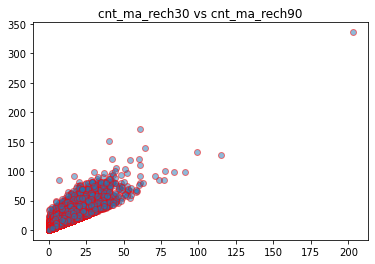

In [36]:
plt.scatter(dt["cnt_ma_rech30"],dt["cnt_ma_rech90"],alpha=0.5,edgecolors='r')
plt.title("cnt_ma_rech30 vs cnt_ma_rech90")
plt.show()

Observation:
    
    We can use any one of the above two independent variables as they both are highly correlated.
    
    Before dropping , we will check distribution for both the variables so as to decide which one to drop.

<AxesSubplot:ylabel='Density'>

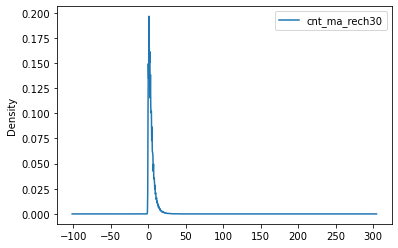

In [37]:
dt['cnt_ma_rech30'].plot(kind='density',legend=True)

<AxesSubplot:ylabel='Density'>

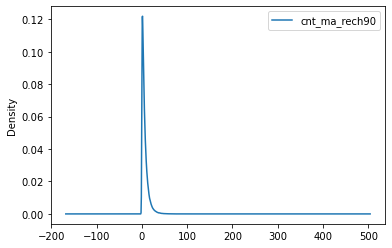

In [38]:
dt['cnt_ma_rech90'].plot(kind='density',legend=True)

In [39]:
dt_new.shape

(209593, 33)

In [40]:
dt_new=dt_new.drop('cnt_ma_rech30',axis=1)

In [41]:
dt_new.shape

(209593, 32)

#### sumamnt_ma_rech30 & sumamnt_ma_rech90

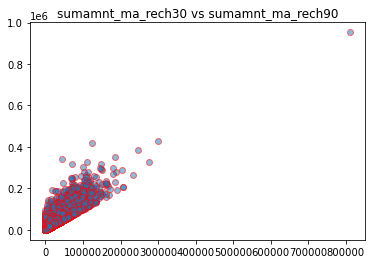

In [42]:
plt.scatter(dt["sumamnt_ma_rech30"],dt["sumamnt_ma_rech90"],alpha=0.5,edgecolors='r')
plt.title("sumamnt_ma_rech30 vs sumamnt_ma_rech90")
plt.show()

Observation:
    
    We can use any one of the above two independent variables as they both are highly correlated.
    
    Before dropping , we will check distribution for both the variables so as to decide which one to drop.

<AxesSubplot:ylabel='Density'>

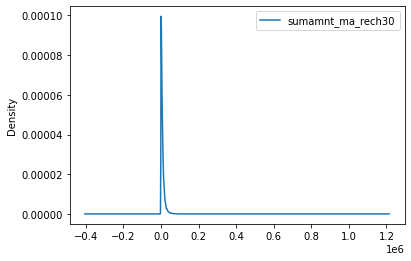

In [43]:
dt['sumamnt_ma_rech30'].plot(kind='density',legend=True)

<AxesSubplot:ylabel='Density'>

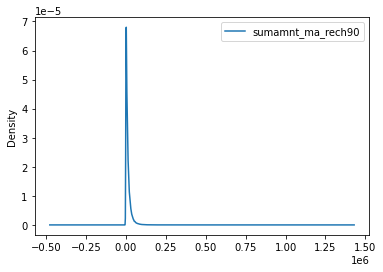

In [44]:
dt['sumamnt_ma_rech90'].plot(kind='density',legend=True)

In [45]:
dt_new.shape

(209593, 32)

In [46]:
dt_new=dt_new.drop('sumamnt_ma_rech30',axis=1)

In [47]:
dt_new.shape

(209593, 31)

#### cnt_loans30 & amnt_loans30

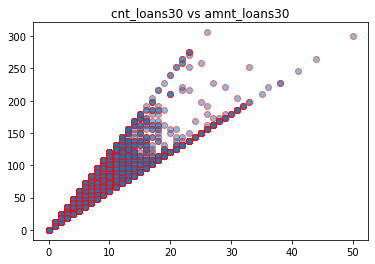

In [48]:
plt.scatter(dt["cnt_loans30"],dt["amnt_loans30"],alpha=0.5,edgecolors='r')
plt.title("cnt_loans30 vs amnt_loans30")
plt.show()

Observation:
    
    We can use any one of the above two independent variables as they both are highly correlated.
    
    Before dropping , we will check distribution for both the variables so as to decide which one to drop.

<AxesSubplot:ylabel='Density'>

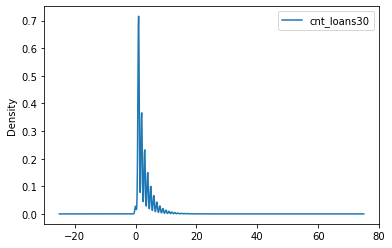

In [49]:
dt['cnt_loans30'].plot(kind='density',legend=True)

<AxesSubplot:ylabel='Density'>

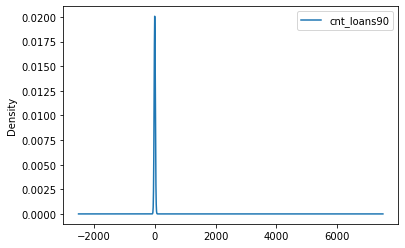

In [50]:
dt['cnt_loans90'].plot(kind='density',legend=True)

In [51]:
dt_new.shape

(209593, 31)

In [52]:
dt_new=dt_new.drop('cnt_loans30',axis=1)

In [53]:
dt_new.shape

(209593, 30)

#### amnt_loans30 & amnt_loans90

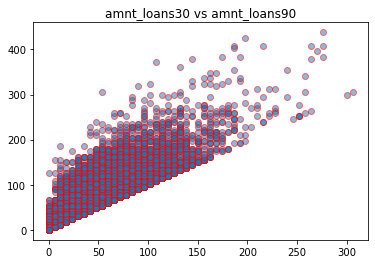

In [54]:
plt.scatter(dt['amnt_loans30'],dt['amnt_loans90'],alpha=0.5,edgecolors='r')
plt.title("amnt_loans30 vs amnt_loans90")
plt.show()

Observation:
    
    We can use any one of the above two independent variables as they both are highly correlated.
    
    Before dropping , we will check distribution for both the variables so as to decide which one to drop.

<AxesSubplot:ylabel='Density'>

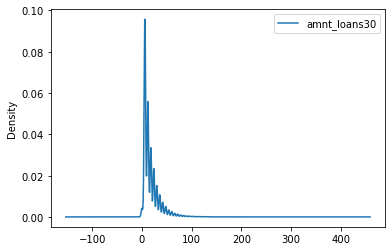

In [55]:
dt['amnt_loans30'].plot(kind='density',legend=True)

<AxesSubplot:ylabel='Density'>

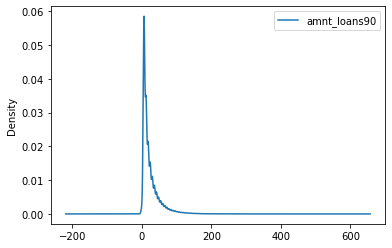

In [56]:
dt['amnt_loans90'].plot(kind='density',legend=True)

In [57]:
dt_new.shape

(209593, 30)

In [58]:
dt_new=dt_new.drop('amnt_loans30',axis=1)

In [59]:
dt_new.shape

(209593, 29)

##### Observation:
    
    After bivariate analysis, we have reduced number of relevant columns from 35 to 29. We have removed those columns which are more than 90% correlated with some other column.

# Univariate Analysis

In [60]:
dt_new.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,year,month
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,1539.0,7.50,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,7
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,5787.0,61.04,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,8
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,1539.0,66.32,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,8
3,1,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.0,0.00,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,6
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,2309.0,29.00,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,6


In [61]:
dt_new.columns

Index(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'fr_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'year', 'month'],
      dtype='object')

In [62]:
list=dt_new.columns

In [63]:
list[-1]

'month'

#### 1. 'aon' - Age on cellular network in days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aon', ylabel='Density'>

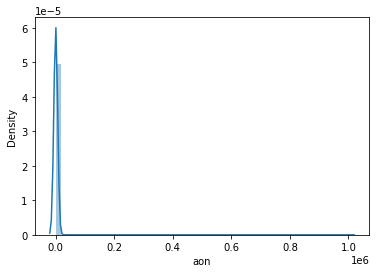

In [64]:
sn.distplot(dt_new['aon'])

##### Observation:-
    
    The 'aon' data is not normally distributed so we will apply transform to remove skewness and try to make data more like normally distributed.

In [65]:
dt_new['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

##### Observation:-
    
    The negative numbers in days column means the outliers are present. We will try to remove outliers in further steps.
    
    The mean value of 'aon' column is much greater than median value, so we conclude that the data is right-skewed and it can be displayed using distribution plot.

In [66]:
dt_new['aon'].skew()

10.392948821587439

In [67]:
temp=dt_new['aon']

In [68]:
import numpy as np
print(print(np.log(dt_new['aon']).skew()))
print(np.sqrt(dt_new['aon']).skew())
print(np.cbrt(dt_new['aon']).skew())

2.2760294883993573
None
9.782738261339498
8.740118054611601


C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### Observation:-
    
    We can see the skewness value is less after applying log transform. We will further check the distribution plots after using all three transforms.

#### distribution plot and statistical summary after log transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


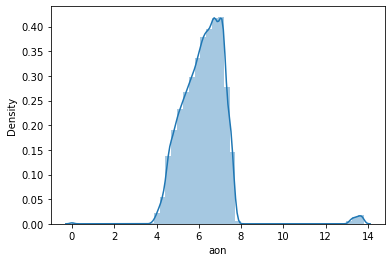

count    208054.000000
mean          6.236966
std           1.139479
min           0.000000
25%           5.521461
50%           6.276643
75%           6.893656
max          13.815371
Name: aon, dtype: float64


C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [69]:
sn.distplot(np.log(dt_new['aon']))
plt.show()
print(np.log(dt_new['aon']).describe())

##### Observation:-
    
    After log transform, the mean and median values are almost same i.e. 6.2 , so skewness has been reduced but we still see the significant difference between 75th percentile and the maximum value and also from distribution plot we can see the outliers are present which will be handled in further steps.

#### distribution plot and statistical summary after sqrt transform

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


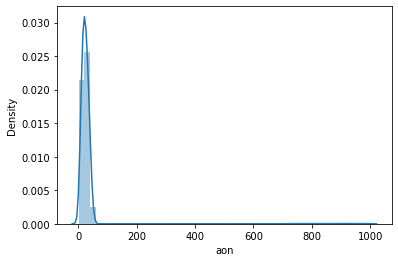

count    208054.000000
mean         32.239156
std          84.458610
min           1.000000
25%          15.811388
50%          23.065125
75%          31.400637
max         999.930375
Name: aon, dtype: float64


C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
sn.distplot(np.sqrt(dt_new['aon']))
plt.show()
print(np.sqrt(dt_new['aon']).describe())

##### Observation:-
    
    After square-root transformation, we can see the mean is still greater than the median, so the data is right skewed. Also the standard deviation is still large . So we will not consider square-root transformation. 

#### distribution plot and statistical summary after cuberoot transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


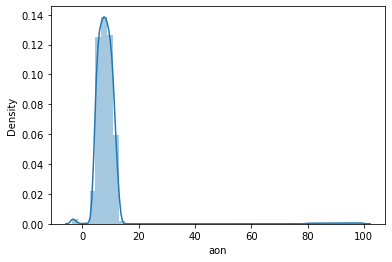

count    209593.000000
mean          8.864776
std           8.553744
min          -3.634241
25%           6.265827
50%           8.077374
75%           9.939636
max          99.995358
Name: aon, dtype: float64


In [71]:
sn.distplot(np.cbrt(dt_new['aon']))
plt.show()
print(np.cbrt(dt_new['aon']).describe())

##### Observation:-
    
    After cuberoot transformation, we can see the mean and median values are almost same but the standard devaiation value is still greater than standard deviation after log transform. So we will consider log transform for 'aon' column.

In [72]:
dt_new['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

In [73]:
dt_new['aon']=np.log(dt_new['aon'])

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [74]:
dt_new['aon'].describe()

count    208054.000000
mean          6.236966
std           1.139479
min           0.000000
25%           5.521461
50%           6.276643
75%           6.893656
max          13.815371
Name: aon, dtype: float64

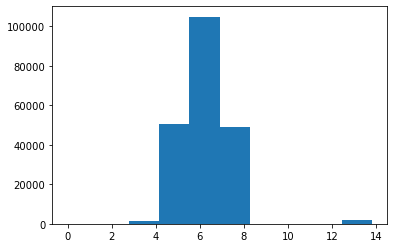

In [75]:
plt.hist(dt_new['aon'])
plt.show()

##### Observation:-
    
    After applying log transform on 'aon' column, the data has become normally distributed but still there are some outliers present which will be handled in further steps.

In [273]:
low_limit=dt_new['aon'].mean() - 3*dt_new['aon'].std()
upp_limit=dt_new['aon'].mean() + 3*dt_new['aon'].std()
print("Lower limit: ",low_limit)
print("Upper limit: ",upp_limit)

Lower limit:  2.8185282903454727
Upper limit:  9.655403060342612


In [274]:
dt_new['aon'].describe()

count    208054.000000
mean          6.236966
std           1.139479
min           0.000000
25%           5.521461
50%           6.276643
75%           6.893656
max          13.815371
Name: aon, dtype: float64

#### 2.'daily_decr90' - daily amount spent from main account ,averaged over last 30 days

In [76]:
list[2]

'daily_decr90'

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

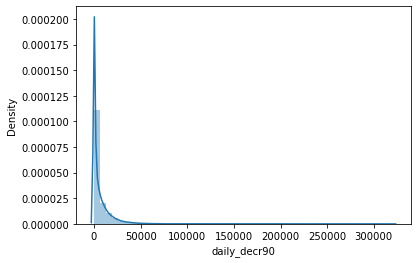

In [77]:
sn.distplot(dt_new['daily_decr90'])

In [78]:
dt_new['daily_decr90'].describe()

count    209593.000000
mean       6082.515068
std       10918.812767
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64

##### Observation:
    
    From the distribution plot and the statistical summary, we can see than the mean value is much much greater than median, so the data in 'daily_decr90' column is right skewed data.
    
    Also, the minimum value present is negative and recharge amount can not be negative so there are outliers present in the dataset which will be processed later on.

In [79]:
dt_new['daily_decr90'].skew()

4.252565025615919

In [80]:
dt_new['daily_decr90'].value_counts()

0.000        4063
500.000       781
1000.000      490
700.000       343
600.000       316
             ... 
784.600         1
84.276          1
12853.830       1
1307.920        1
16839.040       1
Name: daily_decr90, Length: 158670, dtype: int64

##### Observation::-
        
        We see presence of 0 in the recharge data so we cannot apply log transform as log of 0 is not defined. we will use square-root or cube root transform.

In [81]:
temp=dt_new['daily_decr90']
temp.skew()

4.252565025615919

In [82]:
print(np.sqrt(temp).skew())
print(np.cbrt(temp).skew())

1.2264404456385847
0.6076074745680442


C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### observation:-

       We can see that the skewness is less when we apply cuberoot transform rather than square-root transform, but we will check with distribution plot and statistical summary for each transform.

#### distribution plot & statistical summary after cuberoot transform

In [83]:
np.cbrt(temp).skew()

0.6076074745680442

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

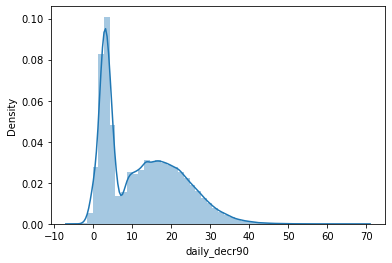

In [84]:
sn.distplot(np.cbrt(temp))

In [85]:
np.cbrt(temp).describe()

count    209593.000000
mean         12.542163
std           9.716358
min          -4.530861
25%           3.495013
50%          11.447142
75%          19.834289
max          68.443895
Name: daily_decr90, dtype: float64

#### distribution plot & statistical summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

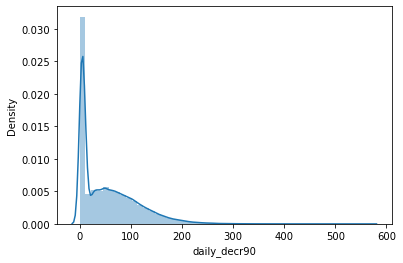

In [86]:
sn.distplot(np.sqrt(temp))

In [87]:
np.sqrt(temp).describe()

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    207754.000000
mean         54.887239
std          55.890760
min           0.000000
25%           6.706092
50%          39.301272
75%          88.864152
max         566.241998
Name: daily_decr90, dtype: float64

##### observation:-
    
        After comparing distribution plots and statistical summary for 'daily_decr90' column after applying square root and cube root transforms, we see that the standard deviations is less in case of cuberoot transform but we might get outlier values which we need to take care in further steps.

In [88]:
temp

0          3065.150000
1         12124.750000
2          1398.000000
3            21.228000
4           150.619333
              ...     
209588      151.872333
209589       36.936000
209590    11904.350000
209591    12574.370000
209592     4534.820000
Name: daily_decr90, Length: 209593, dtype: float64

In [89]:
dt_new['daily_decr90'].skew()

4.252565025615919

In [90]:
dt_new['daily_decr90']=np.cbrt(dt['daily_decr90'])

In [91]:
dt_new['daily_decr90'].skew()

0.6076074745680442

### 3.'rental90' - Average main account balance over last 90 days

In [92]:
list[3]

'rental90'

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rental90', ylabel='Density'>

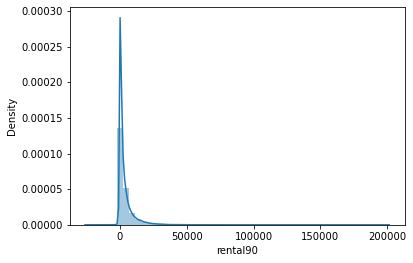

In [93]:
sn.distplot(dt_new['rental90'])

##### observation:-

        We can see the data distribution is right skewed and outliers are also present but the outliers may be high recharge amounts by some customers.

In [94]:
dt['rental90'].describe()

count    209593.000000
mean       3483.406534
std        5770.461279
min      -24720.580000
25%         300.260000
50%        1334.000000
75%        4201.790000
max      200148.110000
Name: rental90, dtype: float64

Observation:
    
    From the distribution plot, boxplot and the statistical summary, we can see than the mean value is much much greater than median, so the data in 'rental90' column is right skewed data.
    
    We will apply log,squarerrot and cuberoot transforms to try to remove the skewness.

In [95]:
temp=dt_new['rental90']
temp.skew()

4.437680540074498

#### distribution plot and statistical summary after log transform

In [96]:
temp.value_counts()

0.00        6918
200.13       913
99.56        767
60.00        691
90.00        685
            ... 
2973.25        1
601.86         1
13778.29       1
1477.55        1
5688.69        1
Name: rental90, Length: 141033, dtype: int64

##### Observation:
    
    As there are 0 present in the column, we can not apply log transform.

#### distribution plot and statistical summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rental90', ylabel='Density'>

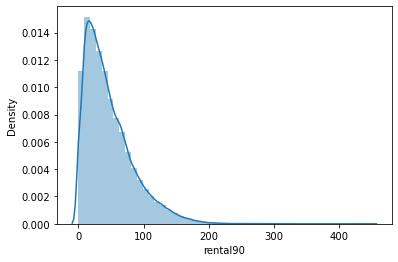

In [97]:
sn.distplot(np.sqrt(temp))

In [98]:
np.sqrt(temp).describe()

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    203664.000000
mean         46.989420
std          37.285931
min           0.000000
25%          18.972809
50%          37.746589
75%          65.806535
max         447.379157
Name: rental90, dtype: float64

#### distribution plot and statistical summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rental90', ylabel='Density'>

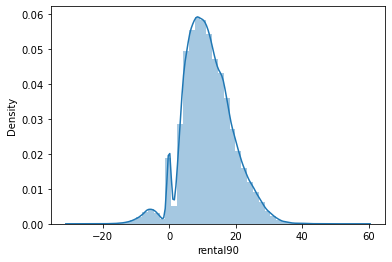

In [99]:
sn.distplot(np.cbrt(temp))

In [100]:
np.cbrt(temp).describe()

count    209593.000000
mean         11.576757
std           7.325563
min         -29.130832
25%           6.696263
50%          11.008258
75%          16.136578
max          58.494787
Name: rental90, dtype: float64

Observation:-
    
    After comparing the distribution plots and statistical summary after cuberoot and square root transform, we can see that there is some data loss because of negative value presence during square root transform, and also the standard deviation is less with cuberoot transforms.

In [101]:
dt_new['rental90'].skew()

4.437680540074498

In [102]:
dt_new['rental90']=np.cbrt(dt_new['rental90'])

In [103]:
dt_new['rental90'].skew()

0.1732893976758105

In [104]:
list[4]

'last_rech_date_ma'

### 4. last_rech_date_ma - Number of days till last recharge of main account

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

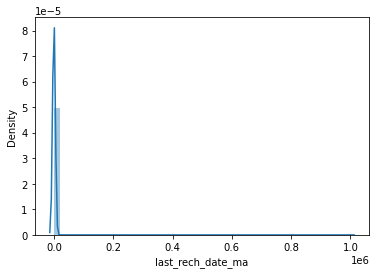

In [105]:
sn.distplot(dt_new['last_rech_date_ma'])

In [106]:
dt_new['last_rech_date_ma'].describe()

count    209593.000000
mean       3755.847800
std       53905.892230
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

##### Observation:-
    
    We can see from statistical summary that the mean is much much large than median , so the data is right skewed. Also, there is significantly large difference between 75th percentile and the maximum value. So we can conclude the presence of outliers.
    
    we will try to remove skewness to make data normally distributed.

#### distribution plot and statistical summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

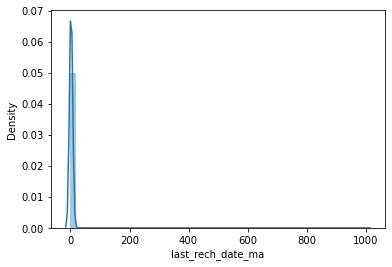

In [107]:
sn.distplot(np.sqrt(dt_new['last_rech_date_ma']))

In [108]:
np.sqrt(dt_new['last_rech_date_ma']).describe()

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    208278.000000
mean          6.335977
std          61.152058
min           0.000000
25%           1.000000
50%           1.732051
75%           2.645751
max         999.324961
Name: last_rech_date_ma, dtype: float64

#### distribution plot and statistical summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

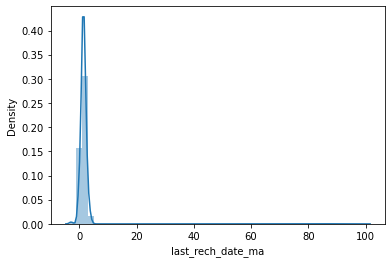

In [109]:
sn.distplot(np.cbrt(dt_new['last_rech_date_ma']))

In [110]:
np.cbrt(dt_new['last_rech_date_ma']).describe()

count    209593.000000
mean          1.904398
std           6.348011
min          -3.072317
25%           1.000000
50%           1.442250
75%           1.912931
max          99.954992
Name: last_rech_date_ma, dtype: float64

##### Observation:-

    After comparing distribution plots and statistic summary for both square root and cube root transforms, we see that after square root transform the mean value is still greater than median , i.e., the data is still skewed and the standard devaition is also veru much high in case of square root transform, hence we will applu cube root transform as it has mean=median and the standard deviation is also less.

In [111]:
dt_new['last_rech_date_ma']=np.cbrt(dt_new['last_rech_date_ma'])

In [112]:
dt_new['last_rech_date_ma'].describe()

count    209593.000000
mean          1.904398
std           6.348011
min          -3.072317
25%           1.000000
50%           1.442250
75%           1.912931
max          99.954992
Name: last_rech_date_ma, dtype: float64

In [113]:
list[5]

'last_rech_date_da'

### 5.last_rech_date_da - Number of days till last recharge of data account

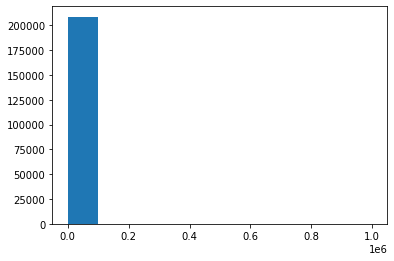

In [114]:
plt.hist(dt_new['last_rech_date_da'])
plt.show()

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

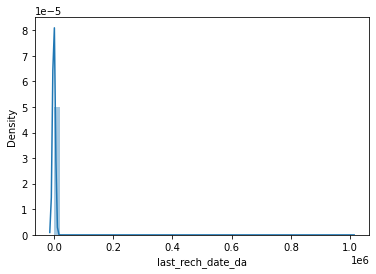

In [115]:
sn.distplot(dt_new['last_rech_date_da'])

In [116]:
dt_new['last_rech_date_da'].describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

##### Observation:-
    
    from distribution plot and statistical summary we see that the data is not normally distributed. The mean is much large than median so the data is right skewed and we will apply cuberoot transform as we have 0 and -ve values in dataset, we can not apply log and square root transform.

#### distribution plot and statistical summary after cuberoot transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

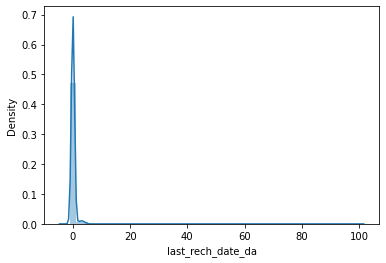

In [117]:
sn.distplot(np.cbrt(dt_new['last_rech_date_da']))

In [118]:
np.cbrt(dt_new['last_rech_date_da']).describe()

count    209593.000000
mean          0.532454
std           6.386408
min          -3.072317
25%           0.000000
50%           0.000000
75%           0.000000
max          99.972386
Name: last_rech_date_da, dtype: float64

Observation:
    
    After cube root transform, we see that the mean and median values are same but still we encounter some outliers which will be handled later.

In [119]:
dt_new['last_rech_date_da']=np.cbrt(dt_new['last_rech_date_da'])

In [120]:
list[6]

'last_rech_amt_ma'

### 6.last_rech_amt_ma - Amount of last recharge of main account ( in Indonesian Rupiah)

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

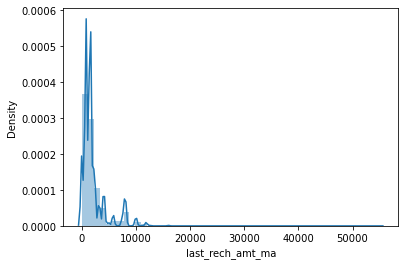

In [121]:
sn.distplot(dt_new['last_rech_amt_ma'])

In [122]:
dt_new['last_rech_amt_ma'].describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

##### Observation:-
    
    from the dist plot and stat summary, we observe that the mean value is greater than median which is making our data right skewed, also the standard deviation value is too much large. To remove these problems , we will apply and check the results of log, square root and cube root transforms.
    
    Also, we see that there is large difference between 75th percentile and maximum value, so we conclude that there is presence of outliers but those outlier values in fact might be high recharge amounts by some customers. So we will handle these values later.

#### distribution plot and stat summary after log transform

##### Observation:-

        We can see from the stat summary that the min value present is 0, so we can not apply log transform.

#### distribution plot and stat summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

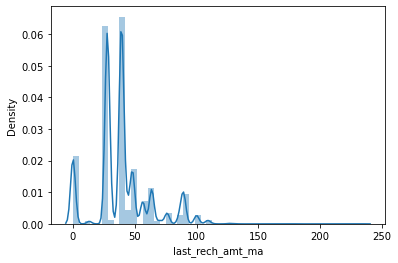

In [123]:
sn.distplot(np.sqrt(dt_new['last_rech_amt_ma']))

In [124]:
np.sqrt(dt_new['last_rech_amt_ma']).describe()

count    209593.000000
mean         39.470845
std          22.505724
min           0.000000
25%          27.748874
50%          39.230090
75%          48.052055
max         234.520788
Name: last_rech_amt_ma, dtype: float64

Observation:-
    
    After square root transform, the mean and median values have become same but after observing the dist plot, we see that the data is still not normally distributed. So we will check after cuberoot transform.

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

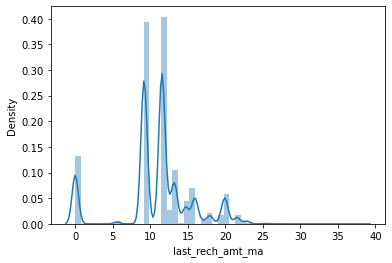

In [125]:
sn.distplot(np.cbrt(dt_new['last_rech_amt_ma']))

In [126]:
np.cbrt(dt_new['last_rech_amt_ma']).describe()

count    209593.000000
mean         10.991792
std           4.872685
min           0.000000
25%           9.165656
50%          11.545503
75%          13.217256
max          38.029525
Name: last_rech_amt_ma, dtype: float64

##### Observation:-
    
    After cuberoot transform, the data is still not normally distributed but the differences between (mean & median) , (75th percentile & maximum) are minimized , so although the data is not normally distributed, the outlier values which might be high recharge amounts into main account are handled with cuberoot transform. So we will apply cuberoot transform for 'last_rech_amt_ma'

In [127]:
dt_new['last_rech_amt_ma'].describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

In [128]:
dt_new['last_rech_amt_ma']=np.cbrt(dt_new['last_rech_amt_ma'])

In [129]:
dt_new['last_rech_amt_ma'].describe()

count    209593.000000
mean         10.991792
std           4.872685
min           0.000000
25%           9.165656
50%          11.545503
75%          13.217256
max          38.029525
Name: last_rech_amt_ma, dtype: float64

In [130]:
list[7]

'fr_ma_rech30'

### 7.fr_ma_rech30 - frequency of main account recharged in last 30 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

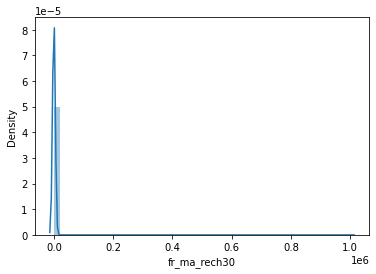

In [131]:
sn.distplot(dt_new['fr_ma_rech30'])

In [132]:
dt_new['fr_ma_rech30'].describe()

count    209593.000000
mean       3737.355121
std       53643.625172
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max      999606.368132
Name: fr_ma_rech30, dtype: float64

##### observation:-

        The mean value is much much greater than the median , so to remove the skewness we will use transforms.
        
        Also, the difference between 75th percentile and max value shows the presence of outliers which will be handled later.

#### distribution plot and stat summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

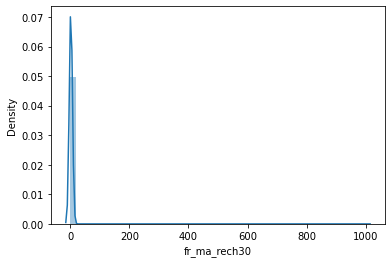

In [133]:
sn.distplot(np.sqrt(dt_new['fr_ma_rech30']))

In [134]:
np.sqrt(dt_new['fr_ma_rech30']).describe()

count    209593.000000
mean          5.706366
std          60.867152
min           0.000000
25%           0.000000
50%           1.414214
75%           2.449490
max         999.803165
Name: fr_ma_rech30, dtype: float64

##### Observation:-
    
    Even after square root transform, the mean value is greater than median and the standard devaition value is also large. So we will check with cuberoot transform.

#### distribution plot and stat summary after cuberoot transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

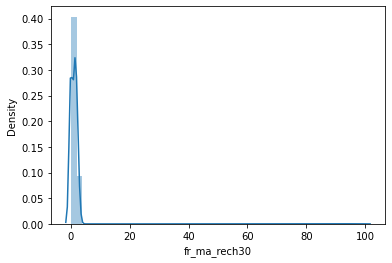

In [135]:
sn.distplot(np.cbrt(dt_new['fr_ma_rech30']))

In [136]:
np.cbrt(dt_new['fr_ma_rech30']).describe()

count    209593.000000
mean          1.497888
std           6.376764
min           0.000000
25%           0.000000
50%           1.259921
75%           1.817121
max          99.986877
Name: fr_ma_rech30, dtype: float64

##### observation:-

        The mean and median values are equal after cuberoot transform , so we will keep cuberoot transform.
        
        The large standard devaiation value could be because of outliers. We still see huge difference between 75th percentile and max value. We will deal with the outliers in later steps.

In [137]:
dt_new['fr_ma_rech30']=np.cbrt(dt_new['fr_ma_rech30'])

In [138]:
list[8]

'medianamnt_ma_rech30'

### 8. medianamnt_ma_rech30 - Median of amount of recharges done in main account over last 30 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

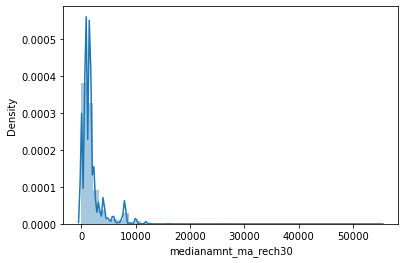

In [139]:
sn.distplot(dt_new['medianamnt_ma_rech30'])

In [140]:
dt_new['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1812.817952
std        2070.864620
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64

##### Observation:-

        from the distplot and stats summary, we see that the mean value is greater than median , the data is right skewed. We will apply transforms to remove the skewness.
        
        The huge difference between 75th percentile and max value shows that there are outliers present . 

#### distribution plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

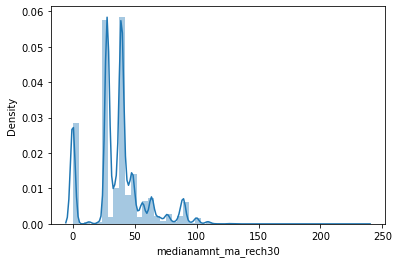

In [141]:
sn.distplot(np.sqrt(dt_new['medianamnt_ma_rech30']))

In [142]:
np.sqrt(dt_new['medianamnt_ma_rech30']).describe()

count    209593.000000
mean         36.632826
std          21.699223
min           0.000000
25%          27.748874
50%          39.230090
75%          43.863424
max         234.520788
Name: medianamnt_ma_rech30, dtype: float64

##### Observation:-

        We see after square root transform, the mean is now less than median value i.e. now the data is left skewed but the difference between 75th percentile and max is reduced i.e. outliers have been handled after square root transform.
        But we will check with cuberoot transform.

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

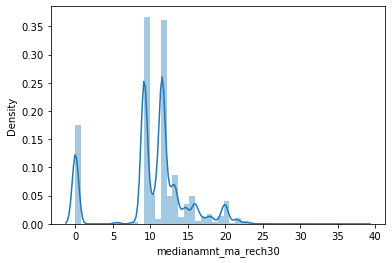

In [143]:
sn.distplot(np.cbrt(dt_new['medianamnt_ma_rech30']))

In [144]:
np.cbrt(dt_new['medianamnt_ma_rech30']).describe()

count    209593.000000
mean         10.350517
std           4.982124
min           0.000000
25%           9.165656
50%          11.545503
75%          12.437555
max          38.029525
Name: medianamnt_ma_rech30, dtype: float64

##### observation:-

        After cuberoot transform, the mean value is still less than median but the difference is very less and the standard deviation value is also less as compared to square root transform. SO we will apply cube root transform.

In [145]:
dt_new['medianamnt_ma_rech30']=np.cbrt(dt_new['medianamnt_ma_rech30'])

In [146]:
list[9]

'medianmarechprebal30'

### 9.medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

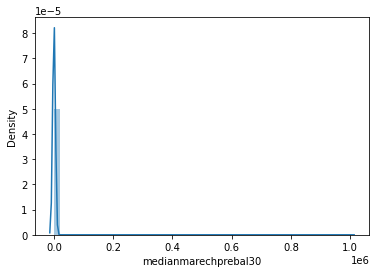

In [147]:
sn.distplot(dt_new['medianmarechprebal30'])

In [148]:
dt_new['medianmarechprebal30'].describe()

count    209593.000000
mean       3851.927942
std       54006.374433
min        -200.000000
25%          11.000000
50%          33.900000
75%          83.000000
max      999479.419319
Name: medianmarechprebal30, dtype: float64

##### observation:-

        The distplot and the difference of mean and median value clearly shows that the data is right skewed , we will use transforms to remove skewness.
        
        Also, the large standard deviation and the huge difference between 75th percentile and max value point towards presence of outliers which will be handled in later steps.

#### dist plot and stats summary after log transform

In [149]:
dt_new['medianmarechprebal30'].value_counts()

0.00      30680
20.00      1108
19.00      1091
17.00      1060
10.00      1045
          ...  
73.13         1
72.62         1
86.20         1
74.87         1
332.61        1
Name: medianmarechprebal30, Length: 30428, dtype: int64

##### Observation:
        
     As 0 is present in the dataset, we can not apply log transform.

#### dist plot and stats summary after cuberoot transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

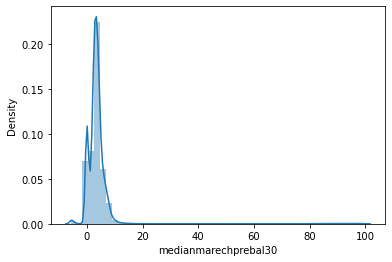

In [150]:
sn.distplot(np.cbrt(dt_new['medianmarechprebal30']))

In [151]:
np.cbrt(dt_new['medianmarechprebal30']).describe()

count    209593.000000
mean          3.708701
std           6.592529
min          -5.848035
25%           2.223980
50%           3.236433
75%           4.362071
max          99.982644
Name: medianmarechprebal30, dtype: float64

##### Observation:-
    
    The mean and median values are equal after cuberoot transform and the difference between 75th percentile and max is also reduced from before. SO we will keep cuberoot transform.

In [152]:
dt_new['medianmarechprebal30']=np.cbrt(dt_new['medianmarechprebal30'])

In [153]:
list[10]

'cnt_ma_rech90'

### 10.cnt_ma_rech90 - Number of times main account got recharged in last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

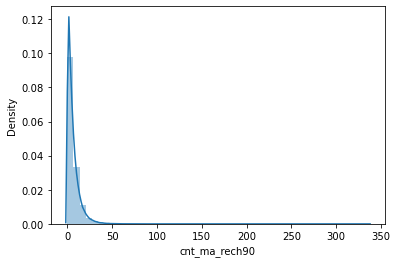

In [154]:
sn.distplot(dt_new['cnt_ma_rech90'])

In [155]:
dt_new['cnt_ma_rech90'].describe()

count    209593.00000
mean          6.31543
std           7.19347
min           0.00000
25%           2.00000
50%           4.00000
75%           8.00000
max         336.00000
Name: cnt_ma_rech90, dtype: float64

##### Observation:
    
    The large standard deviation and the huge difference between 75th percentile and max shows the presence of outliers. We will try to apply transforms to see if the outliers can be controlled.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

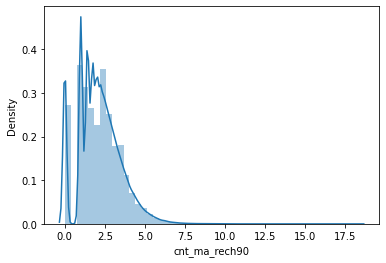

In [156]:
sn.distplot(np.sqrt(dt_new['cnt_ma_rech90']))

In [157]:
np.sqrt(dt_new['cnt_ma_rech90']).describe()

count    209593.000000
mean          2.151014
std           1.299452
min           0.000000
25%           1.414214
50%           2.000000
75%           2.828427
max          18.330303
Name: cnt_ma_rech90, dtype: float64

##### Observation:-
    
    We see that, after square root transform the distribution is not normal, we will try with cuberoot transform

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

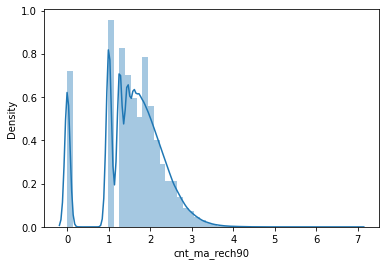

In [158]:
sn.distplot(np.cbrt(dt_new['cnt_ma_rech90']))

In [159]:
np.cbrt(dt_new['cnt_ma_rech90']).describe()

count    209593.000000
mean          1.570723
std           0.739558
min           0.000000
25%           1.259921
50%           1.587401
75%           2.000000
max           6.952053
Name: cnt_ma_rech90, dtype: float64

##### Observation:-
    
    Even after the cube root transform, the data is not perfectly normally distributed but after cube root transform the difference between 75th percentile and max is reduced, so the outliers problem is solved. so we will keep cube root transform.

In [160]:
dt_new['cnt_ma_rech90']=np.cbrt(dt_new['cnt_ma_rech90'])

In [161]:
list[11]

'fr_ma_rech90'

### 11. fr_ma_rech90 - Frequency of main account recharged in last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

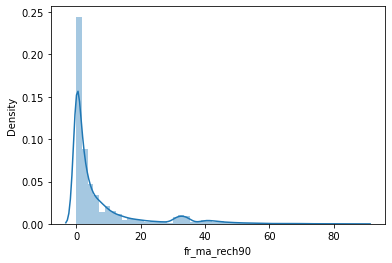

In [162]:
sn.distplot(dt_new['fr_ma_rech90'])

In [163]:
dt_new['fr_ma_rech90'].describe()

count    209593.000000
mean          7.716780
std          12.590251
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

##### Observation:-
    
    The mean value is greater than median value and the significantly large difference between 75th percentile and max value shows that the data is right skewed and outliers are present.
    
    We will try to transform the data to remove skewness.

#### dist plot and stats summary after square-root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

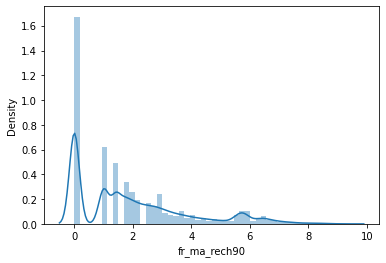

In [164]:
sn.distplot(np.sqrt(dt_new['fr_ma_rech90']))

In [165]:
np.sqrt(dt_new['fr_ma_rech90']).describe()

count    209593.000000
mean          1.948506
std           1.979930
min           0.000000
25%           0.000000
50%           1.414214
75%           2.828427
max           9.380832
Name: fr_ma_rech90, dtype: float64

#### dist plot and stats summary after cuberoot transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

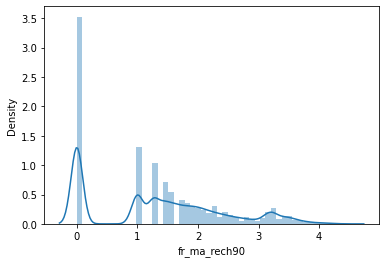

In [166]:
sn.distplot(np.cbrt(dt_new['fr_ma_rech90']))

In [167]:
np.cbrt(dt_new['fr_ma_rech90']).describe()

count    209593.000000
mean          1.321066
std           1.113213
min           0.000000
25%           0.000000
50%           1.259921
75%           2.000000
max           4.447960
Name: fr_ma_rech90, dtype: float64

##### Observation:-
    
    After checking both square-root and cube root transform, the data is still not normally distributed, but the outliers problem is solved with cube root transform as we can see the difference between 75th percentile and max is reduced significantly. So we will keep cuberoot transform.

In [168]:
dt_new['fr_ma_rech90']=np.cbrt(dt_new['fr_ma_rech90'])

In [169]:
list[12]

'sumamnt_ma_rech90'

### 12. sumamnt_ma_rech90 - Total amount of recharge in main account over last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

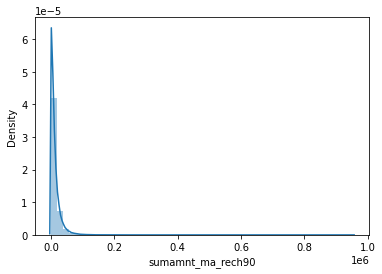

In [170]:
sn.distplot(dt_new['sumamnt_ma_rech90'])

In [171]:
dt_new['sumamnt_ma_rech90'].describe()

count    209593.000000
mean      12396.218352
std       16857.793882
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

##### Observation:
    
    The data is right skewed as displayed from distplot and also the mean value is greater than median value. The huge difference between 75th percentile and max value points towards outlier presence.
    We will try to remove skewness using square root and cube root transforms.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

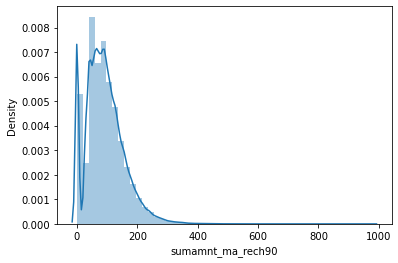

In [172]:
sn.distplot(np.sqrt(dt_new['sumamnt_ma_rech90']))

In [173]:
np.sqrt(dt_new['sumamnt_ma_rech90']).describe()

count    209593.000000
mean         92.260560
std          62.323558
min           0.000000
25%          48.135226
50%          85.005882
75%         126.491106
max         976.235627
Name: sumamnt_ma_rech90, dtype: float64

##### Observation:
    
    Even after square root transform, the mean value is greater than median and the standard devaition is also not reduced much. So we will check cube root transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

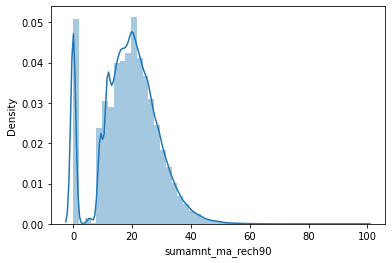

In [174]:
sn.distplot(np.cbrt(dt_new['sumamnt_ma_rech90']))

In [175]:
np.cbrt(dt_new['sumamnt_ma_rech90']).describe()

count    209593.000000
mean         19.084428
std           9.766252
min           0.000000
25%          13.232503
50%          19.333003
75%          25.198421
max          98.409366
Name: sumamnt_ma_rech90, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are equal and the standard devaition is also reduced. So we will go with cube root transform.

In [176]:
dt_new['sumamnt_ma_rech90']=np.cbrt(dt_new['sumamnt_ma_rech90'])

In [177]:
list[13]

'medianamnt_ma_rech90'

### 13. medianamnt_ma_rech90 - Median of amount of recharges done in main account over last 90 days at user level

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

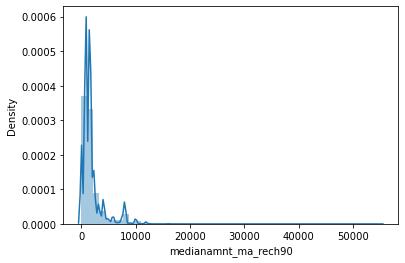

In [178]:
sn.distplot(dt_new['medianamnt_ma_rech90'])

In [179]:
dt_new['medianamnt_ma_rech90'].describe()

count    209593.000000
mean       1864.595821
std        2081.680664
min           0.000000
25%         773.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech90, dtype: float64

##### Observation:
    
    The data is right skewed as displayed from distplot and also the mean value is greater than median value. The huge difference between 75th percentile and max value points towards outlier presence.
    We will try to remove skewness using square root and cube root transforms.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

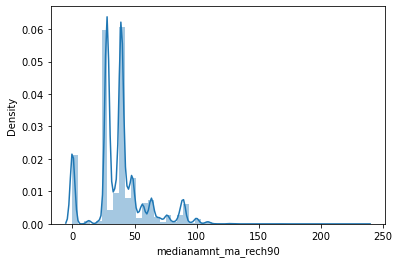

In [180]:
sn.distplot(np.sqrt(dt_new['medianamnt_ma_rech90']))

In [181]:
np.sqrt(dt_new['medianamnt_ma_rech90']).describe()

count    209593.000000
mean         37.820996
std          20.836750
min           0.000000
25%          27.802878
50%          39.230090
75%          43.863424
max         234.520788
Name: medianamnt_ma_rech90, dtype: float64

##### Observation:
    
    After the square root transform, the mean value is less than the median i.e. left skewness and also the standard devaition value is high.
    
    So we will check cube root transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

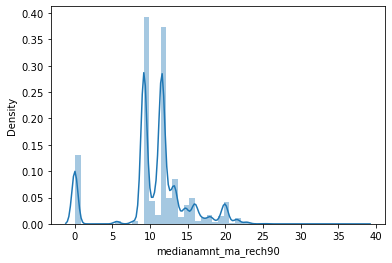

In [182]:
sn.distplot(np.cbrt(dt_new['medianamnt_ma_rech90']))

In [183]:
np.cbrt(dt_new['medianamnt_ma_rech90']).describe()

count    209593.000000
mean         10.705205
std           4.628771
min           0.000000
25%           9.177544
50%          11.545503
75%          12.437555
max          38.029525
Name: medianamnt_ma_rech90, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are almost equal and the standard devaition is also reduced. So we will go with cube root transform.
    
    Also, the difference between 75th percentile and max value is reduced very significantly.

In [184]:
dt_new['medianamnt_ma_rech90']=np.cbrt(dt_new['medianamnt_ma_rech90'])

In [185]:
list[14]

'medianmarechprebal90'

### 14. medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

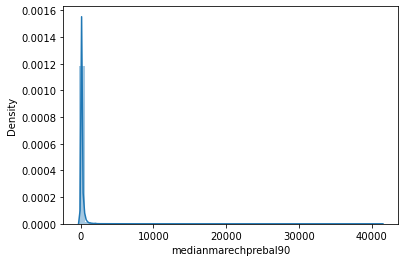

In [186]:
sn.distplot(dt_new['medianmarechprebal90'])

In [187]:
dt_new['medianmarechprebal90'].describe()

count    209593.000000
mean         92.025541
std         369.215658
min        -200.000000
25%          14.600000
50%          36.000000
75%          79.310000
max       41456.500000
Name: medianmarechprebal90, dtype: float64

##### Observation:
    
    The mean is much much greater than median that is why we see right skewness in above distplot, also the presence of outliers is clear from the huge difference between 75th percentile and max value .
    
    We will use log & cuberoot transform as -ve values will not be applicable for square root transform.

#### dist plot and stats summary after log transform

In [188]:
dt_new['medianmarechprebal90'].value_counts()

 0.00      23391
 20.00      1265
 19.00      1208
 26.00      1171
 27.00      1166
           ...  
 35.91         1
 421.70        1
 79.07         1
 133.47        1
-163.80        1
Name: medianmarechprebal90, Length: 29785, dtype: int64

##### Observation:
    
    The data has 0 , so we can not apply log transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

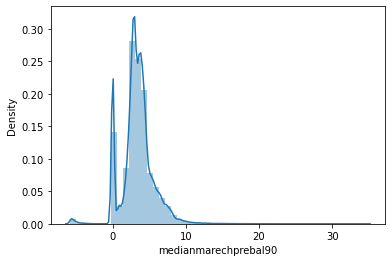

In [189]:
sn.distplot(np.cbrt(dt_new['medianmarechprebal90']))

In [190]:
np.cbrt(dt_new['medianmarechprebal90']).describe()

count    209593.000000
mean          3.356587
std           2.200965
min          -5.848035
25%           2.444092
50%           3.301927
75%           4.296446
max          34.609677
Name: medianmarechprebal90, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are almost equal and the standard devaition is also reduced. So we will go with cube root transform.
    
    Also, the difference between 75th percentile and max value is reduced very significantly.

In [191]:
dt_new['medianmarechprebal90']=np.cbrt(dt_new['medianmarechprebal90'])

In [192]:
list[15]

'cnt_da_rech30'

### 15.cnt_da_rech30 - Number of times data account got recharged in last 30 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

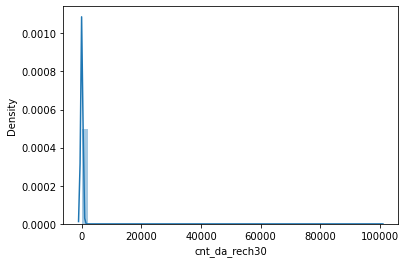

In [193]:
sn.distplot(dt_new['cnt_da_rech30'])

In [194]:
dt_new['cnt_da_rech30'].describe()

count    209593.000000
mean        262.578110
std        4183.897978
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99914.441420
Name: cnt_da_rech30, dtype: float64

##### Observation:
    
    The data is right skewed and outliers presence is detected, we will try to remove skewness using cuberoot transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

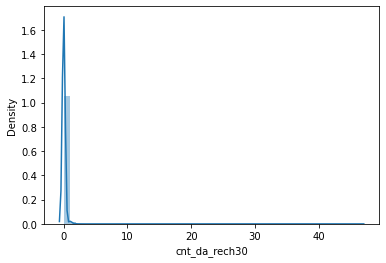

In [195]:
sn.distplot(np.cbrt(dt_new['cnt_da_rech30']))

In [196]:
np.cbrt(dt_new['cnt_da_rech30']).describe()

count    209593.000000
mean          0.195956
std           2.595407
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          46.402647
Name: cnt_da_rech30, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are equal and the standard devaition is also reduced. So we will go with cube root transform.
    
    Also, the difference between 75th percentile and max value is reduced very significantly.

In [197]:
dt_new['cnt_da_rech30']=np.cbrt(dt_new['cnt_da_rech30'])

In [198]:
list[16]

'fr_da_rech30'

### 16. fr_da_rech30 - frequency of data account recharged in last 30 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

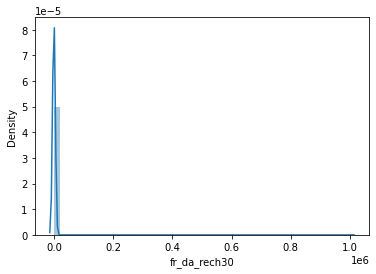

In [199]:
sn.distplot(dt_new['fr_da_rech30'])

In [200]:
dt_new['fr_da_rech30'].describe()

count    209593.000000
mean       3749.494447
std       53885.414979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999809.240107
Name: fr_da_rech30, dtype: float64

##### Observation:
    
    We can see the mean > median is responsible for right skewness and the much much large value of standard deviation is not good. SO we will apply cube root transform to remove skewness and control the outliers.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

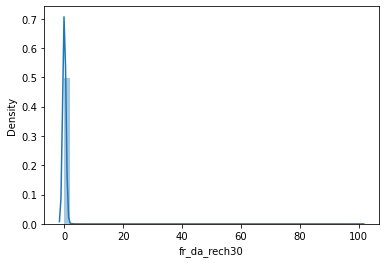

In [201]:
sn.distplot(np.cbrt(dt_new['fr_da_rech30']))

In [202]:
np.cbrt(dt_new['fr_da_rech30']).describe()

count    209593.000000
mean          0.456635
std           6.394223
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          99.993641
Name: fr_da_rech30, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are almost equal and the standard devaition is also reduced. So we will go with cube root transform.
    

In [203]:
dt_new['fr_da_rech30']=np.cbrt(dt_new['fr_da_rech30'])

In [204]:
list[17]

'cnt_da_rech90'

### 17.cnt_da_rech90 - Number of times data account got recharged in last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

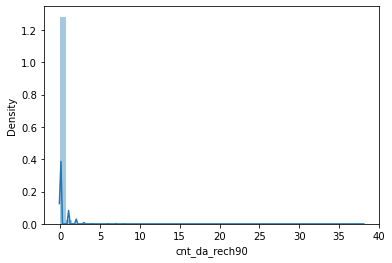

In [205]:
sn.distplot(dt_new['cnt_da_rech90'])

In [206]:
dt_new['cnt_da_rech90'].describe()

count    209593.000000
mean          0.041495
std           0.397556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

In [207]:
dt_new['cnt_da_rech90'].value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64

##### Observation:
    
    

In [208]:
list[18]

'fr_da_rech90'

### 18. fr_da_rech90 - frequency of data account got recharged in last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_da_rech90', ylabel='Density'>

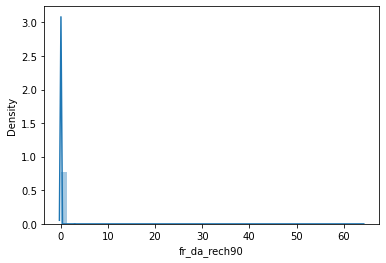

In [209]:
sn.distplot(dt_new['fr_da_rech90'])

In [210]:
dt_new['fr_da_rech90'].describe()

count    209593.000000
mean          0.045712
std           0.951386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: fr_da_rech90, dtype: float64

##### Observation:
    
    

In [211]:
list[19]

'maxamnt_loans30'

### 19. maxamnt_loans30 - Maximum amount of loan taken by user in last 30 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

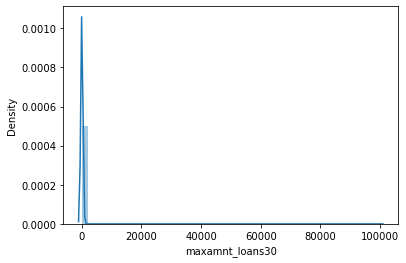

In [212]:
sn.distplot(dt_new['maxamnt_loans30'])

In [213]:
dt_new['maxamnt_loans30'].describe()

count    209593.000000
mean        274.658747
std        4245.264648
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

##### Observation:
    
    The data is right skewed as the mean value is very much greater than median value. The huge difference between 75th percentile and max value points towards outlier presence.
    We will try to remove skewness using square root and cube root transforms.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

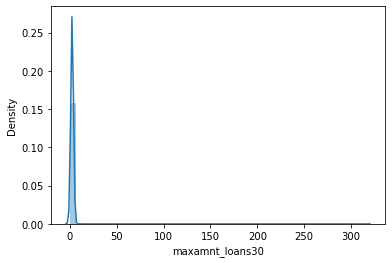

In [214]:
sn.distplot(np.sqrt(dt_new['maxamnt_loans30']))

In [215]:
np.sqrt(dt_new['maxamnt_loans30']).describe()

count    209593.000000
mean          3.636292
std          16.169025
min           0.000000
25%           2.449490
50%           2.449490
75%           2.449490
max         316.013545
Name: maxamnt_loans30, dtype: float64

##### Observation:
    
    Even after square root transform, the mean value is greater than median and the standard devaition is also not reduced much. So we will check cube root transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

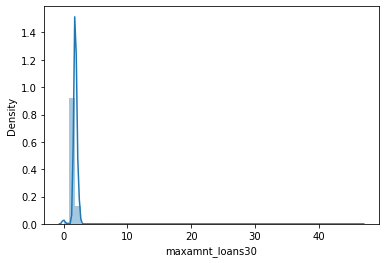

In [216]:
sn.distplot(np.cbrt(dt_new['maxamnt_loans30']))

In [217]:
np.cbrt(dt_new['maxamnt_loans30']).describe()

count    209593.000000
mean          2.020107
std           2.501520
min           0.000000
25%           1.817121
50%           1.817121
75%           1.817121
max          46.394924
Name: maxamnt_loans30, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are almost equal and the standard devaition is also reduced. So we will go with cube root transform.

In [218]:
dt_new['maxamnt_loans30']=np.cbrt(dt_new['maxamnt_loans30'])

In [219]:
list[20]

'medianamnt_loans30'

### 20. medianamnt_loans30 - Median of amount of loans taken by the user in last 30 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Density'>

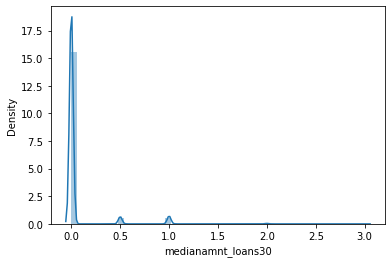

In [220]:
sn.distplot(dt_new['medianamnt_loans30'])

In [221]:
dt_new['medianamnt_loans30'].describe()

count    209593.000000
mean          0.054029
std           0.218039
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans30, dtype: float64

##### Observation:
    
    

In [222]:
list[21]

'cnt_loans90'

### 21. cnt_loans90 - Number of loans taken by the user in last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

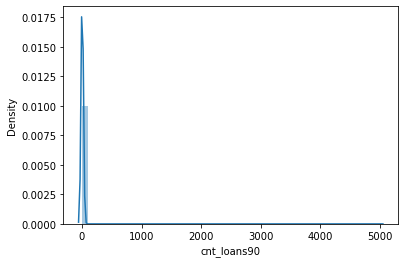

In [223]:
sn.distplot(dt_new['cnt_loans90'])

In [224]:
dt_new['cnt_loans90'].describe()

count    209593.000000
mean         18.520919
std         224.797423
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        4997.517944
Name: cnt_loans90, dtype: float64

##### Observation:
    
    The data is right skewed as the mean value is very much greater than median value.
    
    The huge difference between 75th percentile and max value points towards outlier presence.
    We will try to remove skewness using square root and cube root transforms.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

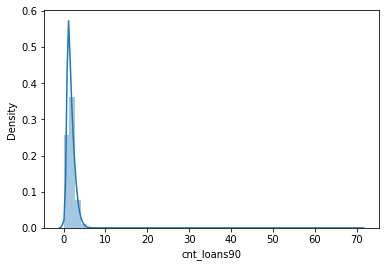

In [225]:
sn.distplot(np.sqrt(dt_new['cnt_loans90']))

In [226]:
np.sqrt(dt_new['cnt_loans90']).describe()

count    209593.000000
mean          1.982559
std           3.819744
min           0.000000
25%           1.000000
50%           1.414214
75%           2.236068
max          70.693125
Name: cnt_loans90, dtype: float64

##### Observation:
    
    After square root transform, the mean value is somewhat greater than median and the standard devaition is also reduced much. We will check cube root transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

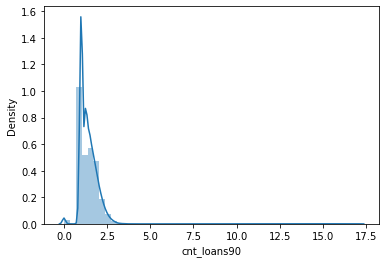

In [227]:
sn.distplot(np.cbrt(dt_new['cnt_loans90']))

In [228]:
np.cbrt(dt_new['cnt_loans90']).describe()

count    209593.000000
mean          1.465070
std           1.014054
min           0.000000
25%           1.000000
50%           1.259921
75%           1.709976
max          17.096929
Name: cnt_loans90, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are almost equal and the standard devaition is also reduced. So we will go with cube root transform.

In [229]:
dt_new['cnt_loans90']=np.cbrt(dt_new['cnt_loans90'])

In [230]:
list[22]

'amnt_loans90'

### 22. amnt_loans90 - Total amount of loans taken by user in last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

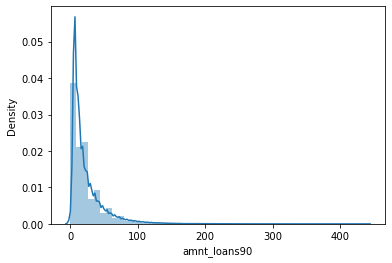

In [231]:
sn.distplot(dt_new['amnt_loans90'])

In [232]:
dt_new['amnt_loans90'].describe()

count    209593.000000
mean         23.645398
std          26.469861
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         438.000000
Name: amnt_loans90, dtype: float64

##### Observation:
    
    The data is right skewed as the mean value is very much greater than median value.
    
    The huge difference between 75th percentile and max value points towards outlier presence.
    We will try to remove skewness using square root and cube root transforms.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

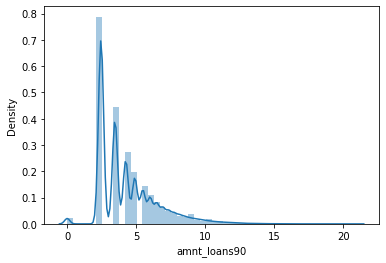

In [233]:
sn.distplot(np.sqrt(dt_new['amnt_loans90']))

In [234]:
np.sqrt(dt_new['amnt_loans90']).describe()

count    209593.000000
mean          4.347337
std           2.178550
min           0.000000
25%           2.449490
50%           3.464102
75%           5.477226
max          20.928450
Name: amnt_loans90, dtype: float64

##### Observation:
    
    After square root transform, the mean value is still greater than median and the standard devaition is also reduced much. We will check cube root transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

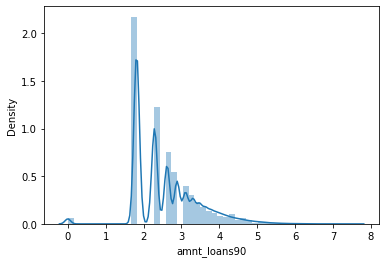

In [235]:
sn.distplot(np.cbrt(dt_new['amnt_loans90']))

In [236]:
np.cbrt(dt_new['amnt_loans90']).describe()

count    209593.000000
mean          2.593969
std           0.857361
min           0.000000
25%           1.817121
50%           2.289428
75%           3.107233
max           7.594363
Name: amnt_loans90, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are almost equal and the standard devaition is also reduced. So we will go with cube root transform.

In [237]:
dt_new['amnt_loans90']=np.cbrt(dt_new['amnt_loans90'])

In [238]:
list[23]

'maxamnt_loans90'

### 23. maxamnt_loans90 - Maximum amount of loan taken by user in 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

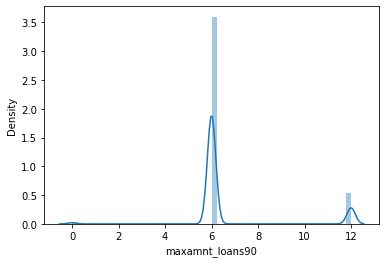

In [239]:
sn.distplot(dt_new['maxamnt_loans90'])

In [240]:
dt_new['maxamnt_loans90'].describe()

count    209593.000000
mean          6.703134
std           2.103864
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64

##### Observation:
    
    The data is almost normally distributed but the standard deviation value can be handled in further steps.

In [241]:
list[24]

'medianamnt_loans90'

### 24. medianamnt_loans90 - median of amount of loans taken by user in last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medianamnt_loans90', ylabel='Density'>

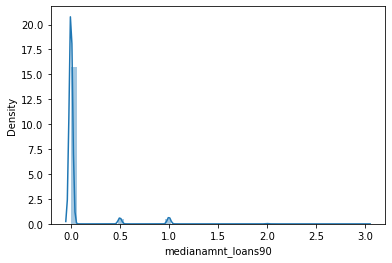

In [242]:
sn.distplot(dt_new['medianamnt_loans90'])

In [243]:
dt_new['medianamnt_loans90'].describe()

count    209593.000000
mean          0.046077
std           0.200692
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans90, dtype: float64

##### Observation:
    
    We don't need to make any changes to this data.

In [244]:
list[25]

'payback30'

### 25. payback30 - Average payback time in days over last 30 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payback30', ylabel='Density'>

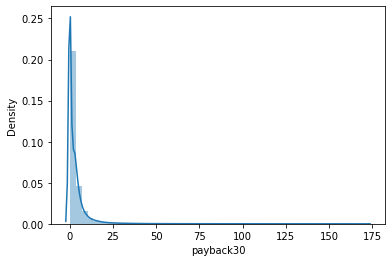

In [245]:
sn.distplot(dt_new['payback30'])

In [246]:
dt_new['payback30'].describe()

count    209593.000000
mean          3.398826
std           8.813729
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64

##### Observation:
    
    The data is right skewed as the mean value is very much greater than median value.
    
    The huge difference between 75th percentile and max value points towards outlier presence.
    We will try to remove skewness using square root and cube root transforms.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payback30', ylabel='Density'>

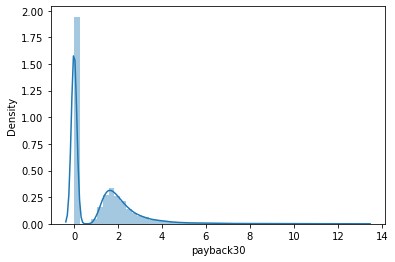

In [247]:
sn.distplot(np.sqrt(dt_new['payback30']))

In [248]:
np.sqrt(dt_new['payback30']).describe()

count    209593.000000
mean          1.131084
std           1.455845
min           0.000000
25%           0.000000
50%           0.000000
75%           1.936492
max          13.095801
Name: payback30, dtype: float64

##### Observation:
    
    After square root transform, the mean value is still greater than median and the standard devaition is also reduced much. We will check cube root transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payback30', ylabel='Density'>

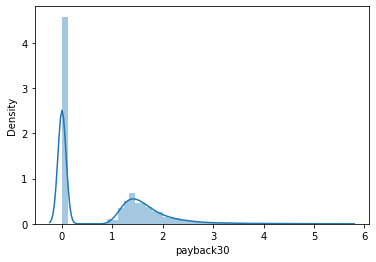

In [249]:
sn.distplot(np.cbrt(dt_new['payback30']))

In [250]:
np.cbrt(dt_new['payback30']).describe()

count    209593.000000
mean          0.835635
std           0.937197
min           0.000000
25%           0.000000
50%           0.000000
75%           1.553616
max           5.555904
Name: payback30, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean and median values are almost equal and the standard devaition is also reduced. So we will go with cube root transform.

In [251]:
dt_new['payback30']=np.cbrt(dt_new['payback30'])

In [252]:
list[26]

'payback90'

### 26. payback90 - Average payback time in days over last 90 days

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payback90', ylabel='Density'>

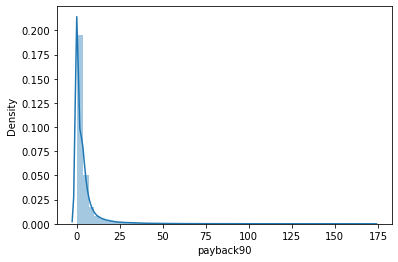

In [253]:
sn.distplot(dt_new['payback90'])

In [254]:
dt_new['payback90'].describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

##### Observation:
    
    The data is right skewed as the mean value is very much greater than median value.
    
    The huge difference between 75th percentile and max value points towards outlier presence.
    We will try to remove skewness using square root and cube root transforms.

#### dist plot and stats summary after square root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payback90', ylabel='Density'>

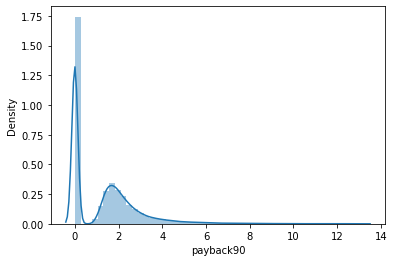

In [255]:
sn.distplot(np.sqrt(dt_new['payback90']))

In [256]:
np.sqrt(dt_new['payback90']).describe()

count    209593.000000
mean          1.331673
std           1.596291
min           0.000000
25%           0.000000
50%           1.290994
75%           2.121320
max          13.095801
Name: payback90, dtype: float64

##### Observation:
    
    After square root transform, the mean value is almost equal to median and the standard devaition is also reduced much. We will check cube root transform.

#### dist plot and stats summary after cube root transform

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payback90', ylabel='Density'>

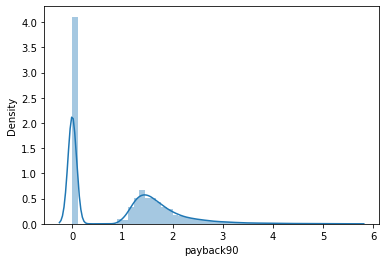

In [257]:
sn.distplot(np.cbrt(dt_new['payback90']))

In [258]:
np.cbrt(dt_new['payback90']).describe()

count    209593.000000
mean          0.961690
std           0.988843
min           0.000000
25%           0.000000
50%           1.185631
75%           1.650964
max           5.555904
Name: payback90, dtype: float64

##### Observation:
    
    After cuberoot transformation, the mean is becoming less than the median value i.e. left skewness is arising, so we will keep square root transform.

In [259]:
dt_new['payback90']=np.sqrt(dt_new['payback90'])

In [260]:
list[27]

'year'

### 27. year

In [261]:
dt_new['year'].value_counts()

2016    209593
Name: year, dtype: int64

Observation:
    
    We can drop the year column.

In [262]:
dt_new.shape

(209593, 29)

In [263]:
dt_new.drop('year',axis=1,inplace=True)

In [264]:
dt_new.shape

(209593, 28)

In [265]:
list[28]

'month'

In [266]:
dt_new.shape

(209593, 28)

# splitting the dataset into x and y 

In [268]:
x=dt_new.drop('label',axis=1)
y=dt_new['label']

In [269]:
x.shape

(209593, 27)

In [270]:
y.shape

(209593,)

##### Observation:

        We have divided the dataset into 'x' i.e. training data and 'y' i.e. test data.

# finding best random state for train_test_split

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ",maxAccu," at random state ",maxRs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

##### Observation:-
    
    We are getting error as "Input contains NaN, infinity or a value too large for dtype('float64')", so we need to check and remove outliers.